# Credit Card - Customer Segmentation

### Data Set Description
This case requires to develop a customer segmentation to define marketing strategy. The sample data set summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- CUSTID: Identification of CC holder
- BALANCE: Balance amount left in their account to make purchases 
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONE_OFF_PURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
- CASH_ADVANCE: Cash in advance given by the user
- PURCHASES_FREQUENCY: How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONE_OFF_PURCHASES_FREQUENCY: How frequently purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
- CASH_ADVANCE_TRX: Number of transactions made with "Cash in Advanced"
- PURCHASES_TRX: Number of purchase transactions made
- CREDIT_LIMIT: Limit of CCs for user
- PAYMENTS: Amount of payments done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user
- PRC_FULL_PAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user

## Import Libraries and Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
sns.set()
%matplotlib inline

In [2]:
dataset = pd.read_csv('dataset.csv')

## Data Preprocessing

In [3]:
dataset.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
dataset.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
dataset = dataset.fillna(dataset.mean())

In [8]:
dataset.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Outliers

In [9]:
def iqr_outliers(dataset):
    '''Identifying outliers with IQR method. Returning number of outliers per Upper and Lower whisker.'''
    upper_outliers = []
    lower_outliers = []

    first_quartile = dataset.quantile(0.25)
    third_quartile = dataset.quantile(0.75)
    
    for i in dataset:
        iqr = third_quartile - first_quartile
        lower_whisker = first_quartile - 1.5 * iqr
        upper_whisker = third_quartile + 1.5 * iqr
        
        if i > upper_whisker:
            upper_outliers.append(i)
        elif i < lower_whisker:
            lower_outliers.append(i)

        upper_outliers.sort()
        lower_outliers.sort()
    
    print(f"Upper Outliers: {len(upper_outliers)} => {upper_outliers}")
    print(f"Lower Outliers: {len(lower_outliers)} => {lower_outliers}")

In [10]:
dataset.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [11]:
for i in range (1, 18):
    print(dataset.columns[i])
    iqr_outliers(dataset[dataset.columns[i]])

BALANCE
Upper Outliers: 695 => [4954.880195000001, 4955.580535, 4962.753828, 4968.771623, 4972.108843, 4976.028578, 4977.237859000001, 4986.400804, 4988.093733, 4994.04832, 4994.9572530000005, 4995.2291159999995, 4995.526188, 5000.8255770000005, 5005.774990999999, 5010.8797030000005, 5019.019126, 5022.775729, 5030.927831, 5032.709807, 5036.762745, 5036.8705310000005, 5044.179003, 5049.442457, 5052.910787, 5055.582822, 5055.816826, 5058.299635, 5058.555256000001, 5063.070919, 5066.461251, 5066.744231000001, 5067.576984, 5082.971064, 5083.397311, 5086.333429, 5088.216894, 5090.523925, 5091.643375, 5097.916969, 5099.850196, 5115.7128490000005, 5118.492838, 5131.239119, 5131.319584000001, 5134.553859000001, 5135.604593, 5145.092629, 5148.625027, 5151.912071, 5161.854898, 5172.929286, 5176.5312969999995, 5177.774511, 5178.179489, 5182.092727, 5193.415429, 5193.661885, 5194.184491, 5199.213536, 5204.383263000001, 5206.452425, 5211.229218, 5211.684904, 5211.797605, 5218.923199, 5220.637076, 5

In [12]:
index_names = dataset[dataset['BALANCE'] > 4955].index 
dataset.drop(index_names, inplace = True)

In [13]:
index_names = dataset[dataset['PURCHASES'] > 2721].index 
dataset.drop(index_names, inplace = True)

In [14]:
index_names = dataset[dataset['ONEOFF_PURCHASES'] > 1445].index 
dataset.drop(index_names, inplace = True)

In [15]:
index_names = dataset[dataset['INSTALLMENTS_PURCHASES'] > 1173].index 
dataset.drop(index_names, inplace = True)

In [16]:
index_names = dataset[dataset['CASH_ADVANCE'] > 2791].index 
dataset.drop(index_names, inplace = True)

In [17]:
index_names = dataset[dataset['CASH_ADVANCE_TRX'] > 40].index 
dataset.drop(index_names, inplace = True)

In [18]:
index_names = dataset[dataset['PURCHASES_TRX'] > 70].index 
dataset.drop(index_names, inplace = True)

In [19]:
index_names = dataset[dataset['CREDIT_LIMIT'] >= 14000].index 
dataset.drop(index_names, inplace = True)

In [20]:
index_names = dataset[dataset['PAYMENTS'] >= 4200].index 
dataset.drop(index_names, inplace = True)

In [21]:
index_names = dataset[dataset['MINIMUM_PAYMENTS'] > 1911].index 
dataset.drop(index_names, inplace = True)

In [22]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,860.462732,0.846458,403.649199,207.063465,196.910630,395.859927,0.440620,0.141017,0.324856,0.101814,1.994907,8.338313,3248.572442,773.044817,395.739591,0.146991,11.449669
std,1017.591260,0.262641,453.930283,343.810570,273.571273,665.156738,0.385473,0.240556,0.377442,0.160771,3.788954,9.918759,2488.718254,722.396525,360.844292,0.285092,1.433283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.019163,0.000000,6.000000
25%,56.700974,0.818182,24.820000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,289.294959,151.533895,0.000000,12.000000
50%,468.138723,1.000000,254.230000,0.000000,57.000000,0.000000,0.333333,0.000000,0.166667,0.000000,0.000000,6.000000,2500.000000,555.119249,232.422715,0.000000,12.000000
75%,1324.358273,1.000000,618.410000,288.515000,319.990000,548.676050,0.833333,0.166667,0.666667,0.166667,2.000000,12.000000,4000.000000,1018.082331,558.067782,0.125000,12.000000
max,4940.113918,1.000000,2598.910000,1443.330000,1170.490000,2784.274703,1.000000,1.000000,1.000000,1.500000,38.000000,69.000000,13500.000000,4188.764712,1910.925633,1.000000,12.000000


## Preparation for Training

In [23]:
dataset = dataset.drop(['CUST_ID'], axis = 1)

In [24]:
X = dataset.iloc[:, 1:17].values

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## KNN Model

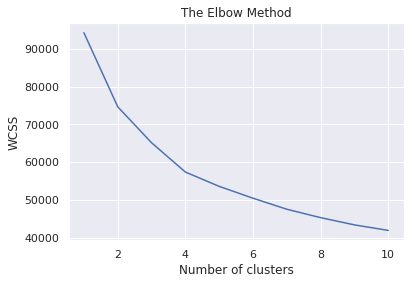

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [28]:
dataset['CLUSTER'] = pd.Series(data=y_kmeans, index=dataset.index)

dataset_with_clusters = dataset.copy()
dataset_with_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.0,0.166667,0.000000,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.0,1.000000,1.000000,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.0,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,678.334763,244.791237,0.0,12,0
7,1823.652743,1.000000,436.20,0.00,436.2,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.0,12,3
8,1014.926473,1.000000,861.49,661.49,200.0,0.0,0.333333,0.083333,0.250000,0.0,0,5,7000.0,688.278568,311.963409,0.0,12,0


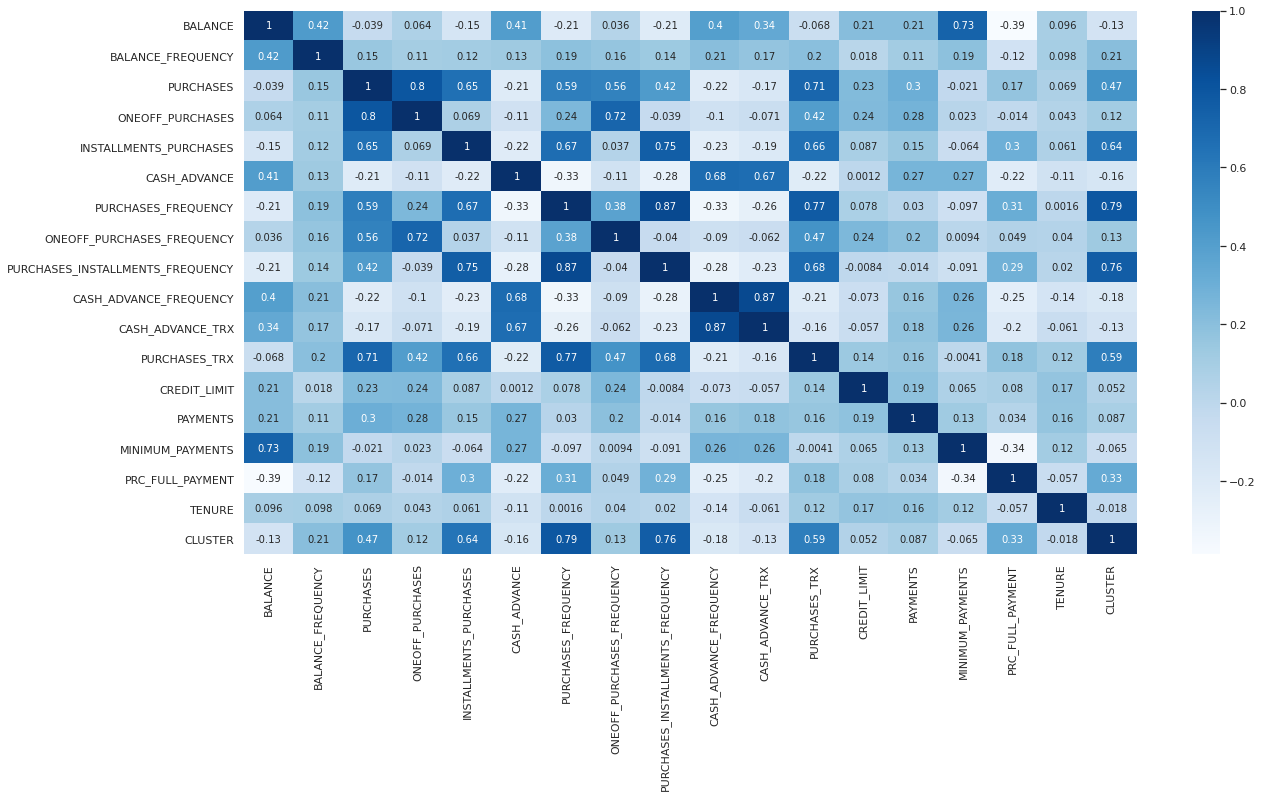

In [29]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(dataset_with_clusters.corr(), cmap='Blues', annot = True)

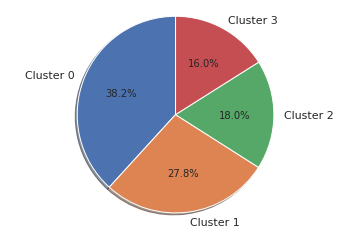

In [30]:
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
sizes = dataset_with_clusters['CLUSTER'].value_counts()
explode = (0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

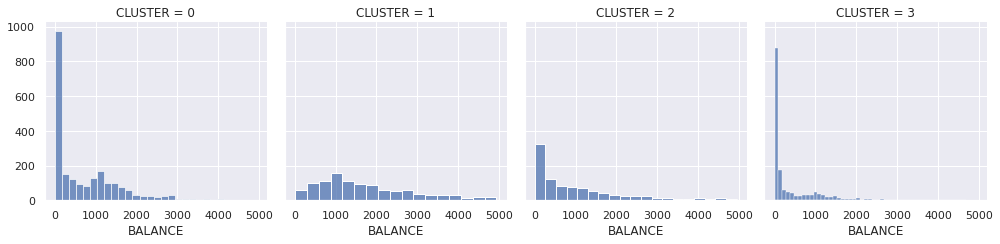

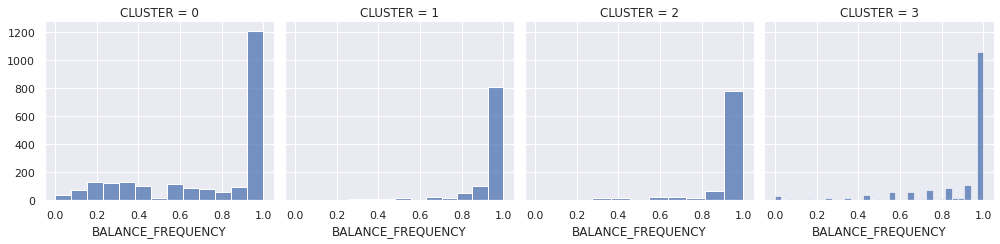

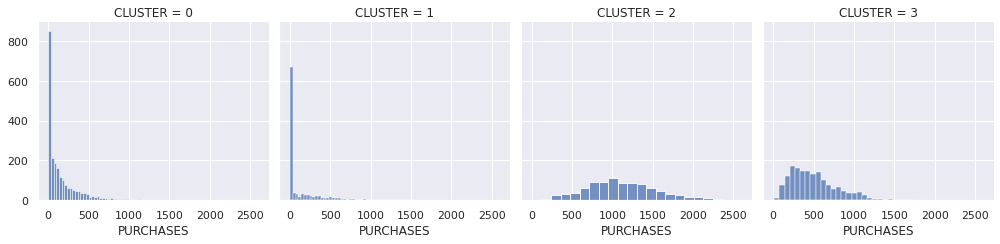

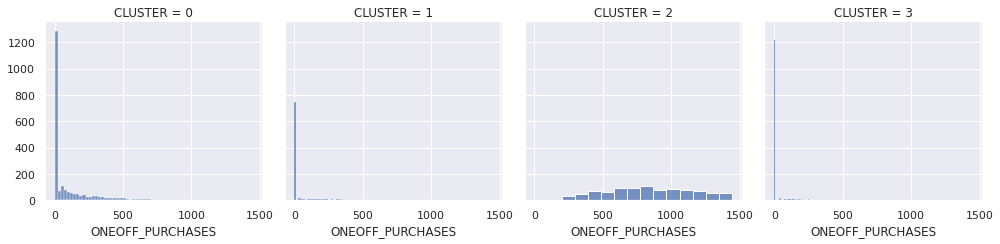

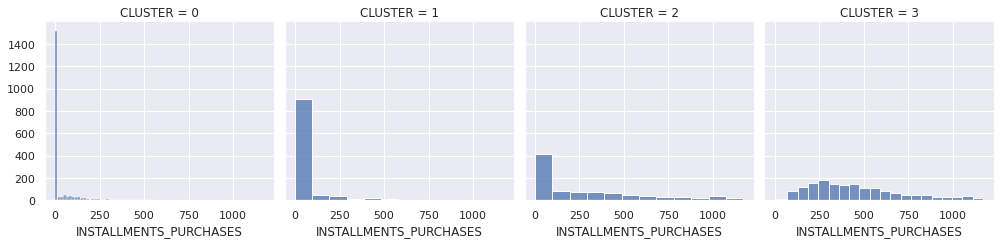

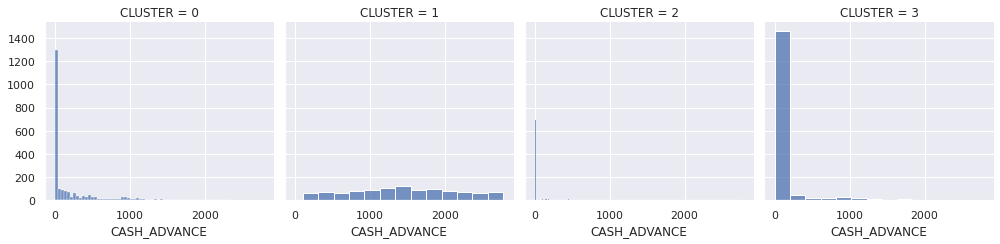

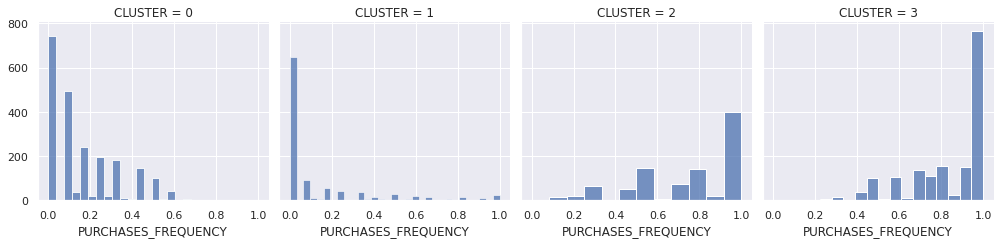

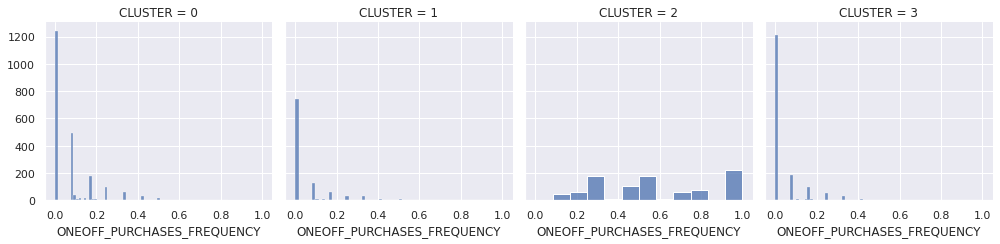

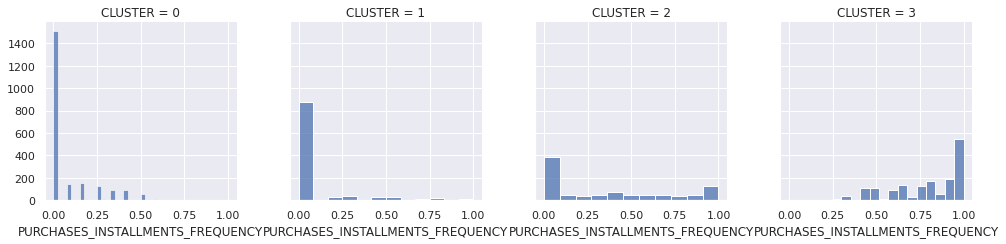

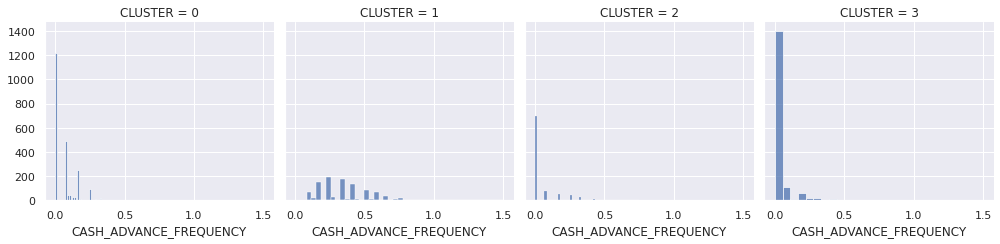

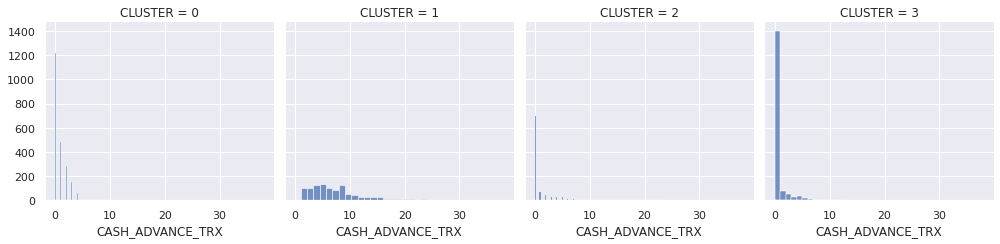

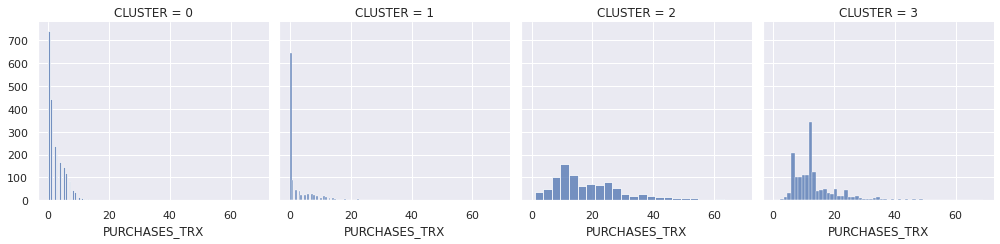

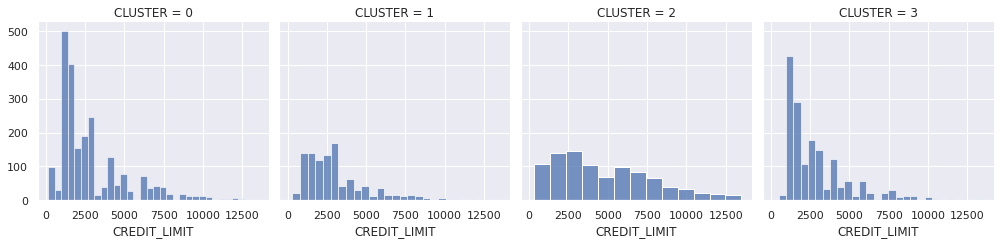

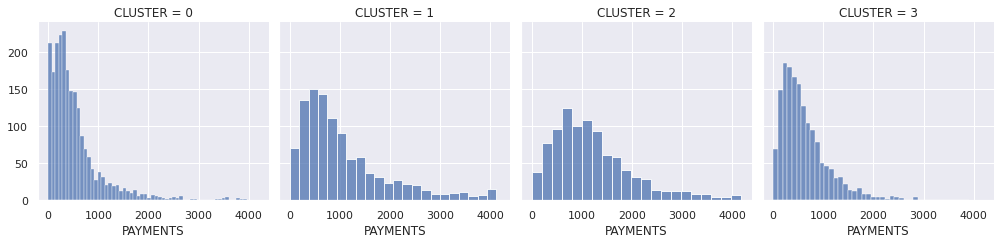

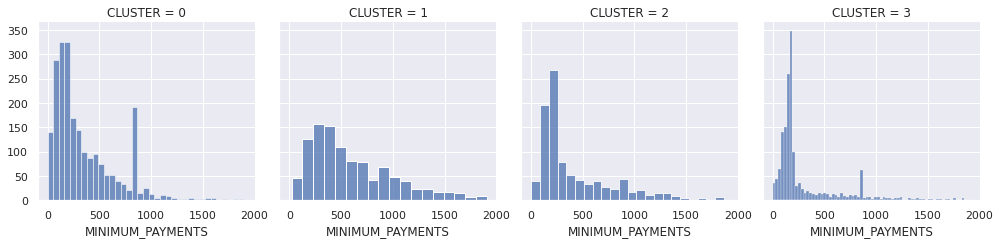

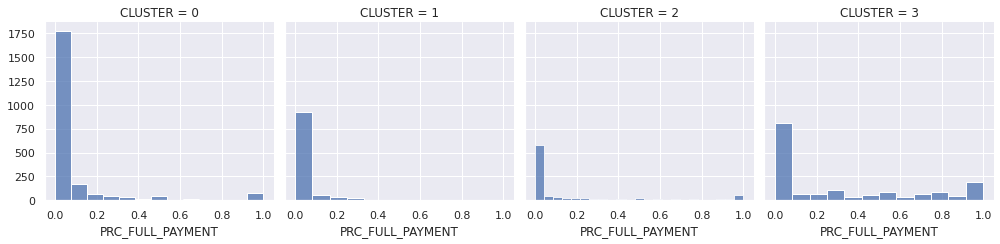

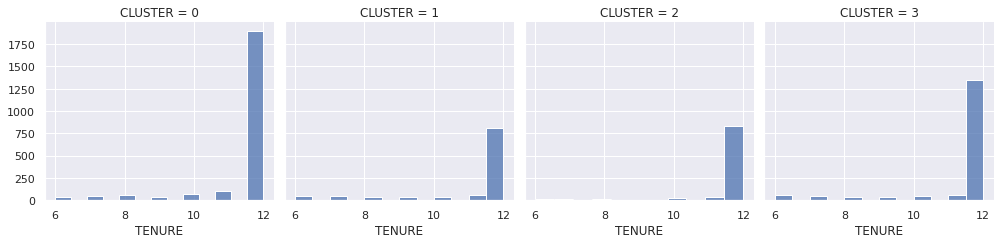

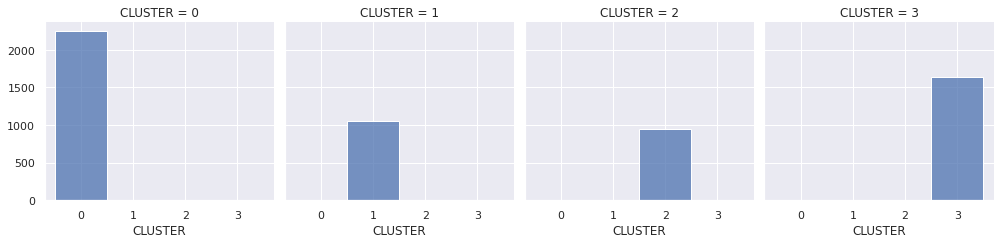

In [31]:
for cluster in dataset_with_clusters:
    g = sns.FacetGrid(dataset_with_clusters, col='CLUSTER', height = 3.5, col_wrap = 4)
    g.map(sns.histplot, cluster)

In [32]:
cluster_0 = dataset_with_clusters[dataset_with_clusters['CLUSTER'] == 0].describe()
cluster_0

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.0
mean,710.042033,0.746521,156.294392,113.703743,42.809734,206.862567,0.160176,0.071761,0.084333,0.060546,0.893428,2.362789,2914.526843,547.822586,352.431024,0.077092,11.528419,0.0
std,848.884632,0.323512,207.827418,200.362952,82.726189,359.483347,0.168060,0.108766,0.144949,0.078774,1.268562,2.678426,2311.069823,577.876006,310.135810,0.209204,1.296748,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000,0.0
25%,27.735987,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,197.973691,131.681540,0.000000,12.000000,0.0
50%,343.217745,1.000000,77.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,2000.000000,382.196662,229.759203,0.000000,12.000000,0.0
75%,1163.658662,1.000000,224.250000,149.662500,57.000000,265.641391,0.250000,0.083333,0.166667,0.083333,1.000000,4.000000,4000.000000,668.597237,495.045445,0.000000,12.000000,0.0
max,4834.586867,1.000000,1200.000000,1200.000000,554.160000,2333.150712,0.833333,0.833333,0.750000,0.333333,10.000000,17.000000,13500.000000,3961.072777,1900.025531,1.000000,12.000000,0.0


In [33]:
cluster_1 = dataset_with_clusters[dataset_with_clusters['CLUSTER'] == 1].describe()
cluster_1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.0
mean,1725.986497,0.938787,132.542295,84.972219,47.570076,1452.273606,0.144921,0.062515,0.083622,0.352431,7.644004,2.454202,3191.879131,1075.204879,604.893478,0.029703,11.191690,1.0
std,1150.171307,0.145975,243.354400,187.728957,133.472806,707.513007,0.253367,0.133021,0.207545,0.184303,5.422838,4.706562,2176.534324,894.361277,405.591372,0.089492,1.711765,0.0
min,10.268192,0.111111,0.000000,0.000000,0.000000,103.141056,0.000000,0.000000,0.000000,0.083333,1.000000,0.000000,300.000000,0.000000,21.821194,0.000000,6.000000,1.0
25%,867.056737,1.000000,0.000000,0.000000,0.000000,912.024874,0.000000,0.000000,0.000000,0.250000,4.000000,0.000000,1500.000000,454.602419,299.369338,0.000000,12.000000,1.0
50%,1450.649137,1.000000,0.000000,0.000000,0.000000,1435.307385,0.000000,0.000000,0.000000,0.333333,6.000000,0.000000,2500.000000,785.833719,477.284193,0.000000,12.000000,1.0
75%,2405.668534,1.000000,179.515000,65.500000,0.000000,1991.897865,0.166667,0.083333,0.000000,0.428571,10.000000,3.000000,4000.000000,1421.899229,864.206542,0.000000,12.000000,1.0
max,4931.400510,1.000000,1534.710000,1368.000000,1160.000000,2784.274703,1.000000,1.000000,1.000000,1.500000,38.000000,33.000000,13000.000000,4119.519203,1910.925633,1.000000,12.000000,1.0


In [34]:
cluster_2 = dataset_with_clusters[dataset_with_clusters['CLUSTER'] == 2].describe()
cluster_2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.0
mean,1009.987766,0.933562,1124.771238,837.638709,287.132529,193.786416,0.745128,0.564745,0.361860,0.055548,1.045503,19.237037,4764.263588,1218.761281,417.022592,0.176714,11.664550,2.0
std,1101.452759,0.155776,455.611094,321.392261,332.250305,449.530580,0.258592,0.290776,0.361718,0.114233,2.472956,12.081069,3066.343228,815.470259,367.456557,0.305662,1.119295,0.0
min,0.000000,0.000000,8.400000,8.400000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,1.000000,300.000000,0.000000,3.197940,0.000000,6.000000,2.0
25%,152.255187,1.000000,803.950000,598.950000,0.000000,0.000000,0.583333,0.333333,0.000000,0.000000,0.000000,11.000000,2000.000000,637.044684,172.889643,0.000000,12.000000,2.0
50%,601.920370,1.000000,1087.660000,832.700000,162.000000,0.000000,0.833333,0.500000,0.333333,0.000000,0.000000,16.000000,4000.000000,1057.971559,234.745291,0.000000,12.000000,2.0
75%,1467.458994,1.000000,1399.550000,1085.630000,487.180000,76.361029,1.000000,0.833333,0.666667,0.083333,1.000000,25.000000,7000.000000,1617.884909,595.650324,0.222222,12.000000,2.0
max,4940.113918,1.000000,2598.910000,1443.330000,1170.490000,2703.408056,1.000000,1.000000,1.000000,0.750000,23.000000,69.000000,13500.000000,4188.764712,1864.446362,1.000000,12.000000,2.0


In [35]:
cluster_3 = dataset_with_clusters[dataset_with_clusters['CLUSTER'] == 3].describe()
cluster_3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.0
mean,420.619667,0.873963,503.150673,50.272709,453.746820,88.728082,0.842421,0.042349,0.791005,0.023070,0.401835,14.080734,2869.355790,629.932218,307.620013,0.302057,11.384098,3.0
std,677.655962,0.228518,286.994161,109.817808,259.119555,292.247621,0.190455,0.088359,0.213158,0.067776,1.242110,8.528997,2200.136234,504.486919,336.694318,0.365107,1.544284,0.0
min,0.000000,0.000000,12.000000,0.000000,12.000000,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,0.000000,500.000000,0.000000,0.019163,0.000000,6.000000,3.0
25%,31.301167,0.818182,277.385000,0.000000,255.855000,0.000000,0.666667,0.000000,0.666667,0.000000,0.000000,9.000000,1200.000000,280.832273,132.732852,0.000000,12.000000,3.0
50%,82.980060,1.000000,449.960000,0.000000,401.060000,0.000000,0.916667,0.000000,0.833333,0.000000,0.000000,12.000000,2000.000000,502.277937,171.362848,0.090909,12.000000,3.0
75%,598.042712,1.000000,665.800000,29.950000,600.920000,0.000000,1.000000,0.083333,1.000000,0.000000,0.000000,16.000000,4000.000000,828.837702,295.315090,0.600000,12.000000,3.0
max,4672.628863,1.000000,1738.480000,664.830000,1170.000000,2452.136461,1.000000,1.000000,1.000000,0.666667,12.000000,69.000000,13500.000000,3905.486286,1879.817257,1.000000,12.000000,3.0
